### 대응 표본 T-검정(Paired T-test)
- 동일한 대상의 전후 차이를 비교할 때 사용한다.
- 예 : 다이어트 전후, 약물 복용 전후

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정\n",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터를 생성한다.
# np.random.normal(평균, 표준편차, 개수)
# 다이어트 시작 전 몸무게 (평균 70kg, 표준편차 5, 20명)
np.random.seed(1)
weight_before = np.random.normal(70, 5, 20)

print(f'평균 : {np.mean(weight_before)}')
print(f'표준편차 : {np.std(weight_before)}')
print(f'개수 : {len(weight_before)}')

평균 : 69.33317681769635
표준편차 : 5.499027299051868
개수 : 20


In [3]:
# 다이어트 후 몸무게
# 여기에서는 다이어트 후 감량된 몸무게 데이터를 만들어서 테스트를 해본다.
# 평균3, 표준편차1 인 데이터 20개를 발생시켜서 다이어트 전 몸무게 데이터에서 빼준다.
weight_after = weight_before - np.random.normal(3, 1, 20)
print(f'평균 : {np.mean(weight_after)}')
print(f'표준편차 : {np.std(weight_after)}')
print(f'개수 : {len(weight_after)}')

평균 : 66.37900813037338
표준편차 : 5.597826409681949
개수 : 20


In [4]:
# 통계 검정 수행 (대응 표본 T-검정)
# 단일 집단에 대해 전과 후가 유의미하게 달라졌는지를 비교하는 것
# stats.ttest_rel(전, 후)
# 귀무 가설 : 전후 몸무게의 차이가 평균 0이다 (또는 유의미하게 달라지지 않았다) (효과 없음)
# 대립 가설 : 전후 몸무게의 차이가 평균 0이 아니다 (또는 유의미하게 달라졌다) (효과 있음)
t_stat, p_val = stats.ttest_rel(weight_before, weight_after)
print(f'p value : {p_val:0.3f}')

p value : 0.000


In [5]:
# 시각화를 위해 데이터 프레임을 생성한다.
df_paired = pd.DataFrame({
    'Weight' : np.concatenate([weight_before, weight_after]),
    'Time' : ['Before'] * 20 + ['After'] * 20
})
df_paired

,Weight,Time
0,78.121727,Before
1,66.941218,Before
2,67.359141,Before
3,64.635157,Before
4,74.327038,Before
5,58.492307,Before
6,78.724059,Before
7,66.193965,Before
8,71.595195,Before
9,68.753148,Before


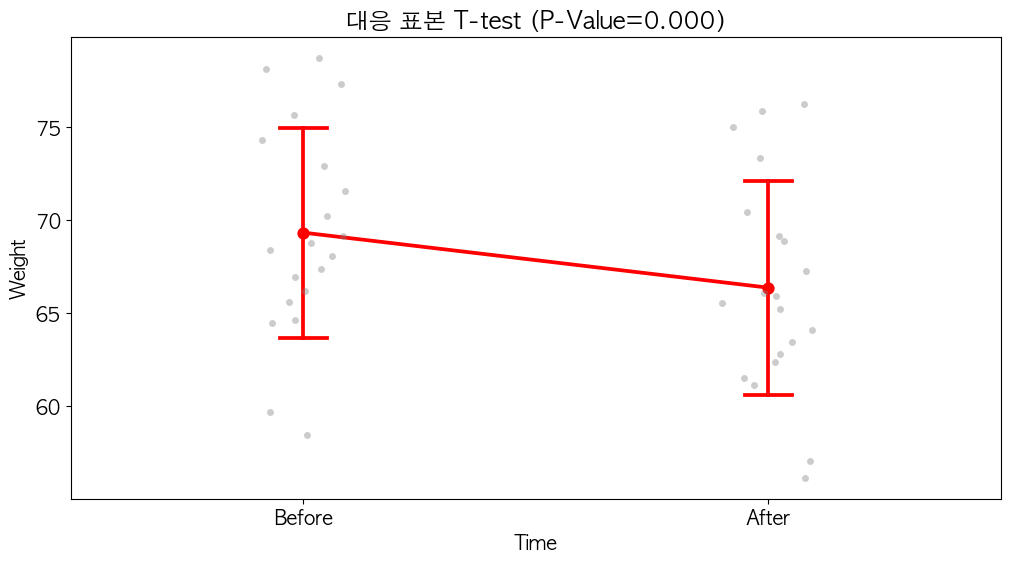

In [6]:
# 포인트 플롯 - 변화의 기울기를 강조
# x, y : 시간 흐름에 따라 몸무게 변화를 그린다.
# errorbar='sd' : 점 위 아래로 표준 편차 막대를 표시해 퍼짐 정보를 보여준다.
# capsize=.1 : 에라바 끝에 작은 가로선을 달아 보기 좋게 한다.
sns.pointplot(data=df_paired, x='Time', y='Weight', errorbar='sd', capsize=.1, color='red')

# 스트립플롯
sns.stripplot(data=df_paired, x='Time', y='Weight', alpha=0.4, color='gray')

plt.title(f'대응 표본 T-test (P-Value={p_val:.3f})')
plt.show()

- 대응 표본 T-test 검정 결과 p value가 0.05보다 작은 0.000 이므로 "다이어트 후 몸무게의 변화가 유의미하지 않다"라는 귀무 가설을 기각한다.
- 따라서 "다이어트는 몸무게를 감량시키는 효과가 유의미하게 있다"
- 시각화를 통해 살펴본 결과 "다어어트 후 몸무게가 감량하는 것을 확인할 수 있다"